# Machine Learning - Assignment 3

### Oscar Fabián Ñáñez Núñez - Juan Camilo Calero Espinosa
### ofnanezn - jccaleroe

In [33]:
from sklearn.datasets import fetch_mldata
from sklearn.preprocessing import scale
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as AL
from sklearn.kernel_approximation import RBFSampler

## 1.

In [23]:
#<x,y>
def phi1(x):
    return np.array([x[0], x[1]])

In [24]:
#(<x,y>)^2
def phi2(x):
    return np.array([x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2])

In [28]:
#(<x,y>+1)^5
#x1^10 + 5 x1^8 x2^2 + 5 x1^8 + 10 x1^6 x2^4 + 20 x1^6 x2^2 + 10 x1^6 + 10 x1^4 x2^6 + 30 x1^4 x2^4 + 30 x1^4 x2^2 + 10 x1^4 + 5 x1^2 x2^8 + 20 x1^2 x2^6 + 30 x1^2 x2^4 + 20 x1^2 x2^2 + 5 x1^2 + x2^10 + 5 x2^8 + 10 x2^6 + 10 x2^4 + 5 x2^2 + 1
def phi3(X):
    x1 = x[0]
    x2 = x[1]
    return np.array([x1**5, np.sqrt(5)*(x1**4)*(x2), np.sqrt(5)*(x1**4), np.sqrt(10)*(x1**3)*(x2**2), np.sqrt(20)*(x1**3)*x2, np.sqrt(10)*(x1**3), np.sqrt(10)*(x1**2)*(x2**3), np.sqrt(30)*(x1**2)*(x2**2), np.sqrt(30)*(x1**2)*x2 , np.sqrt(10)*(x1**2), np.sqrt(5)*x1*(x2**4), np.sqrt(20)*x1*(x2**3), np.sqrt(30)*x1*(x2**2), np.sqrt(20)*x1*x2, np.sqrt(5)*x1, x2**5, np.sqrt(5)*(x2**4), np.sqrt(10)*(x2**3), np.sqrt(10)*(x2**2), np.sqrt(5)*x2 , 1])

In [36]:
def massFuntion(phi, x):
    return np.sum(np.array( [ phi(X) for X in x ] ), axis=0 ) / x.shape[0]

In [37]:
def averageDistance(phi, x):
    s = massFuntion(phi, x)
    return np.sum([AL.norm(phi(X) - s) for X in x ]) / x.shape[0]    

In [39]:
x = np.array([[0,1], [-1,3], [2,4], [3,-1], [-1,2]])
print(averageDistance(phi1, x))
print(averageDistance(phi2, x))
print(averageDistance(phi3, x))

##Gaussian
rbf_feature = RBFSampler(gamma=1, random_state=1)
p = rbf_feature.fit_transform(x)
s = np.sum(p, axis=0) / p.shape[0]
print(np.sum([AL.norm(X - s) for X in p]) / p.shape[0])

2.181590058931585
7.914628929835604
1.4485751647352964e-14
0.8567338704646932


## 2.

## a)

In [2]:
mnist = fetch_mldata('MNIST original')
mnist_features = mnist["data"]
mnist_label = mnist["target"]
print(mnist_features.shape)
print(mnist_label.shape)

(70000, 784)
(70000,)


## b)

In [3]:
mnist_normalized = scale(mnist_features)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [4]:
print("MNIST Normalized Mean:")
print(mnist_normalized.mean(axis=0))
print("MNIST Normalized Std_Deviation:")
print(mnist_normalized.std(axis=0))

MNIST Normalized Mean:
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -8.90297954e-16  1.37035621e-15  3.46195430e-15  1.85119228e-15
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.66164811e-15 -3.96895770e-15 -1.04125612e-15 -3.21838528e-15
  2.96320657e-16  1.94626101e-15  6.56149450e-15  7.37403432e-15
 -8.95523655e-15 -1.17649416e-14 -7.39276874e-15  9.30961023e-15
  3.57000094e-15  1.63714884e-14 -2.70308924e-15 -5.43929257e-15
  1.83800445e-15  2.36091503e-15  1.64787886e-15  2.94463957e-16
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.65354324e-15  2.82215677e-15
 -

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

## c)

We will use the classes 6 and 9.

In [98]:
C_values = [2**i for i in range(-15,11)]

ranges = [(0,5923),(5923,12665),(12665,18623),(18623,24754),(24754,30596),(30596,36017),(36017,41935),(41935,48200),(48200,54051),(54051,60000),
          (60000,60980),(60980,62115),(62115,63147),(63147,64157),(64157,65139),(65139,66031),(66031,66989),(66989,68017),(68017,68991),(68991,70000)]

r_min1_train, r_max1_train = ranges[6][0], ranges[6][1]
r_min2_train, r_max2_train = ranges[9][0], ranges[9][1]
r_min1_test, r_max1_test = ranges[16][0], ranges[16][1]
r_min2_test, r_max2_test = ranges[19][0], ranges[19][1]


features_class6_train = mnist_features[r_min1_train:r_max1_train,:]
features_class9_train = mnist_features[r_min2_train:r_max2_train,:]
labels_class6_train = mnist_label[r_min1_train:r_max1_train]
labels_class9_train = mnist_label[r_min2_train:r_max2_train]
features_class6_test = mnist_features[r_min1_test:r_max1_test,:]
features_class9_test = mnist_features[r_min2_test:r_max2_test,:]
labels_class6_test = mnist_label[r_min1_test:r_max1_test]
labels_class9_test = mnist_label[r_min2_test:r_max2_test]

print(features_class6_train.shape, features_class9_train.shape, labels_class6_train.shape, labels_class9_train.shape)
print(features_class6_test.shape, features_class9_test.shape, labels_class6_test.shape, labels_class9_test.shape)

((5918, 784), (5949, 784), (5918,), (5949,))
((958, 784), (1009, 784), (958,), (1009,))


In [99]:
features_train = np.vstack((features_class6_train, features_class9_train))
features_test = np.vstack((features_class6_test, features_class9_test))
labels_train = np.append(labels_class6_train, labels_class9_train)
labels_test = np.append(labels_class6_test, labels_class9_test)

print(features_train.shape, labels_train.shape)
print(features_test.shape, labels_test.shape)

((11867, 784), (11867,))
((1967, 784), (1967,))


In [100]:
from sklearn import svm

In [101]:
historic_error_train = []
historic_error_test = []

for C in C_values:
    model = svm.LinearSVC(C=C,loss='hinge')
    model.fit(features_train, labels_train)
    predicted_train = model.predict(features_train)
    predicted_test = model.predict(features_test)
    error_train = sklearn.metrics.mean_squared_error(labels_train, predicted_train)
    error_test = sklearn.metrics.mean_squared_error(labels_test, predicted_test)
    historic_error_train.append(error_train)
    historic_error_test.append(error_test)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  


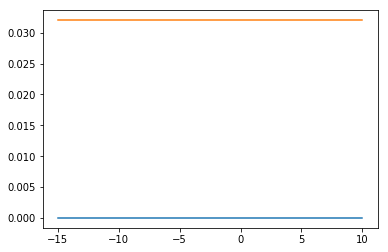

In [102]:
plt.plot([i for i in range(-15,11)],historic_error_train)
plt.hold(True)
plt.plot([i for i in range(-15,11)],historic_error_test)

## d)
Since all values of $C$ have equal error, we will choose $C = 2^0 = 1$.

In [140]:
model = svm.LinearSVC(C=1,loss='hinge')
model.fit(features_train, labels_train)
params = model.get_params()

In [152]:
weights = model.coef_
print(weights.shape)
print(weights)

(1, 784)
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  2.11758237e-21  1.69406589e-21
  -1.65367392e-04 -9.94011648e-06 -8.47032947e-22  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.69406589e-21  1.69406589e-21
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 

## e)

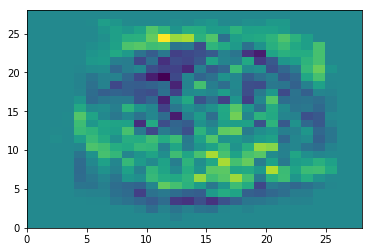

In [157]:
matrix_weights = weights.reshape((28,28))
plt.pcolor(matrix_weights)